In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
titanic.groupby(['sex', 'pclass'])['survived'].mean().unstack()

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [8]:
titanic.pivot_table('survived', index='sex', columns='pclass')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [9]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [10]:
pd.cut?

In [11]:
pd.qcut?

In [12]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [13]:
!wget https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

--2022-10-04 08:54:51--  https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264648 (258K) [text/plain]
Saving to: ‘births.csv’

births.csv          100%[===================>] 258.45K   540KB/s    in 0.5s    

2022-10-04 08:54:52 (540 KB/s) - ‘births.csv’ saved [264648/264648]



In [14]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [16]:
decade = (births['year'] // 10) * 10
decade = decade.astype('str') + 's'
births['decade'] = decade
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960s
1,1969,1,1.0,M,4440,1960s
2,1969,1,2.0,F,4454,1960s
3,1969,1,2.0,M,4548,1960s
4,1969,1,3.0,F,4548,1960s


In [17]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


In [19]:
births.groupby(['decade', 'gender'])['births'].aggregate('sum').unstack()

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


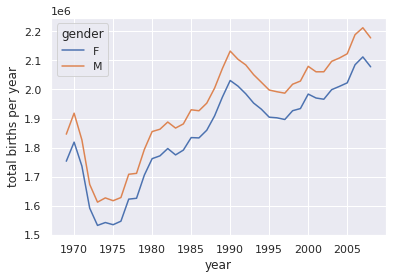

In [20]:
import matplotlib.pyplot as plt
sns.set()
births.groupby(['year', 'gender'])['births'].aggregate('sum').unstack().plot()
plt.ylabel('total births per year')
plt.show()

In [21]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

689.31

In [22]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960s
1,1969,1,1.0,M,4440,1960s
2,1969,1,2.0,F,4454,1960s
3,1969,1,2.0,M,4548,1960s
4,1969,1,3.0,F,4548,1960s


In [24]:
births['day'] = births['day'].astype(int)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960s
1,1969,1,1,M,4440,1960s
2,1969,1,2,F,4454,1960s
3,1969,1,2,M,4548,1960s
4,1969,1,3,F,4548,1960s


In [27]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [28]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960s,2
1969-01-01,1969,1,1,M,4440,1960s,2
1969-01-02,1969,1,2,F,4454,1960s,3
1969-01-02,1969,1,2,M,4548,1960s,3
1969-01-03,1969,1,3,F,4548,1960s,4
